# JavaScript 04 Controlling event

## 이벤트

### 개요

#### 일상 속의 이벤트
- 컴퓨터 키보드를 눌러 텍스트를 입력하는 것 
- 전화벨이 울려 전화가 왔음을 알리는 것 
- 손을 흔들어 인사하는 것 
- 전화기의 버튼을 눌러서 통화를 시작하는 것 
- 리모컨을 사용하여 채널을 변경하는 것

#### 웹에서의 이벤트 - 
- 화면을 스크롤하는 것 
- 버튼을 클릭했을 때 팝업 창이 출력되는 것 
- 마우스 커서의 위치에 따라 드래그 앤 드롭하는 것 
- 사용자의 키보드 입력 값에 따라 새로운 요소를 생성하는 것
- > 웹에서의 모든 동작은 이벤트 발생과 함께 한다.

### event 객체

#### event 
무언가 일어났다는 신호, 사건
- > 모든 DOM 요소는 이러한 event를 만들어 냄

#### 'event' object 
- DOM에서 이벤트가 발생했을 때 생성되는 객체 

- 이벤트 종류 
    - mouse, input, keyboard, touch 
    - https://developer.mozilla.org/en-US/docs/Web/API/Event

#### DOM 요소에서 event가 발생하면, 해당 event는 연결된 이벤트 처리기에 의해 처리 됨 
== `event handler`

### event handler

#### event handler 
특정 이벤트가 발생했을 때 실행되는 함수 
- > 사용자의 행동에 어떻게 반응할지를 JavaScript 코드로 표현한 것

#### .addEventListener() 
대표적인 이벤트 핸들러 중 하나 
- >특정 이벤트를 DOM 요소가 수신할 때마다 콜백 함수를 호출
```js
EventTarget.addEventListener(type, handler) 
```
(DOM 요소)            (수신할 이벤트) (콜백 함수)

"`대상`에 `특정 Event`가 발생하면, `지정한 이벤트를 받아 할 일`을 등록한다.”

#### addEventListener의 인자 
```js
.addEventListener(type, handler)
```
```js
element.addEventListener('click', function (event) {
     // 이벤트 처리 로직 
})
```
- type 
    - 수신할 이벤트 이름 
    - 문자열로 작성 (ex. 'click') 
- handler 
    - 발생한 이벤트 객체를 수신하는 콜백 함수 
    - 이벤트 핸들러는 자동으로 event 객체를 매개변수로 받음

#### addEventListener 활용 
- “버튼을 클릭하면 버튼 요소 출력하기" 
- > 버튼에 이벤트 처리기를 부착하여 클릭 이벤트가 발생하면 이벤트가 발생한 버튼정보를 출력 
  
    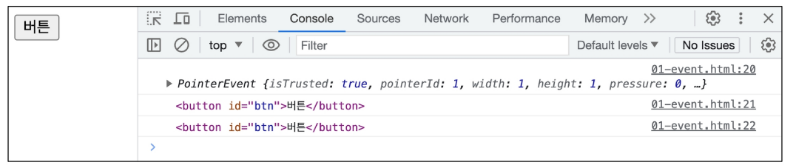

- 요소에 addEventListener를 연결하게 되면 내부의 this 값은 연결된 요소를 가리키게 됨 (event 객체의 currentTarget 속성 값과 동일) 
```js

    <button id="btn">버튼</button>

    // 1. 버튼 선택 
    const btn = document.querySelector('#btn')
    
    // 2. 콜백 함수 
    const detectClick = function (event) { 
        console.log(event) // PointerEvent 
        console.log(event.currentTarget) // <button id="btn">버튼</button> 
        console.log(this) // <button id="btn">버튼</button> 
    }

        // 3. 버튼에 이벤트 핸들러를 부착 
        btn.addEventListener('click', detectClick)
```

#### addEventListener의 콜백 함수 특징 
- 이벤트 핸들러 내부의 this는 이벤트 리스너에 연결된 요소(currentTarget)를 가리킴 
- 이벤트가 발생하면 event 객체가 생성되어 첫 번째 인자로 전달 
    - event 객체가 필요 없는 경우 생략 가능 
- 반환 값 없음 
  ```js
    const btn = document.querySelector('#btn') 
    
    const detectClick = function (event) {
        console.log(event.currentTarget) 
        console.log(this)
    }
    
    btn.addEventListener('click', detectClick)
```

## 버블링

### 버블링 개요
- form > div > p 형태의 중첩된 구조에 각각 이벤트 핸들러가 연결되어 있을 때 만약 <p> 요소를 클릭하면 어떻게 될까? 
```html
<!-- bubbling.html -->
```
```html
<form id="form"> 
    form 
    <div id="div"> 
        div 
        <p id="p">p</p> 
    </div> 
</form> 
```
```js
const formElement = document.querySelector('#form') 
const divElement = document.querySelector('#div') 
const pElement = document.querySelector('#p') 

const clickHandler1 = function (event) { 
    console.log('form이 클릭되었습니다.') 
} 
const clickHandler2 = function (event) { 
    console.log('div가 클릭되었습니다.') 
} 
const clickHandler3 = function (event) { 
    console.log('p가 클릭되었습니다.')
}  

formElement.addEventListener('click', clickHandler1) 
divElement.addEventListener('click', clickHandler2) 
pElement.addEventListener('click', clickHandler3)
```
- <p> 요소만 클릭했는데도 불구하고 모든 핸들러가 동작함 
- > 왜 p만을 클릭했는데 부모 요소 div와 form에 할당된 핸들러까지 동작할까?

    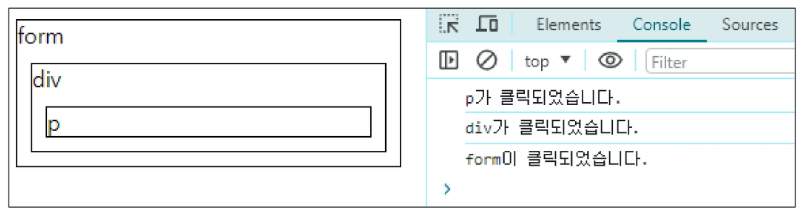

### 버블링 (Bubbling) 
- “한 요소에 이벤트가 발생하면, 이 요소에 할당된 핸들러가 동작하고, 이어서 부모 요소의 핸들러가 동작하는 현상"
- 가장 최상단의 조상 요소(document)를 만날 때까지 이 과정이 반복되면서 요소 각각에 할당된 핸들러가 동작 
- > 이벤트가 제일 깊은 곳에 있는 요소에서 시작해 부모 요소를 거슬러 올라가며 발생하는 것이 마치 물속 거품과 닮았기 때문 
- >최하위의 `<p>` 요소를 클릭하면 p > div > form 순서로 3개의 이벤트 핸들러가 모두 순차적으로 동작했던 것

### 이벤트가 정확히 어디서 발생했는지 접근할 수 있는 방법 
1. event.currentTarget 
2. event.target

#### 'currentTarget' & 'target' 속성 
- 'currentTarget' 속성 
    - '현재' 요소 
    - 항상 이벤트 핸들러가 연결된 요소만을 참조하는 속성 
    - `'this'` 와 같음 

- 'target' 속성 
    - 이벤트가 발생한 가장 안쪽의 요소(target)를 참조하는 속성 
    - 실제 이벤트가 시작된 요소 
    - 버블링이 진행 되어도 변하지 않음

#### 'target' & 'currentTarget' 예시
- 세 요소 중 가장 최상위 요소인 outerouter 요소에만 핸들러가 연결 
- 각 요소를 클릭 했을 때 event의 target과 currentTarget의 차이 비교

    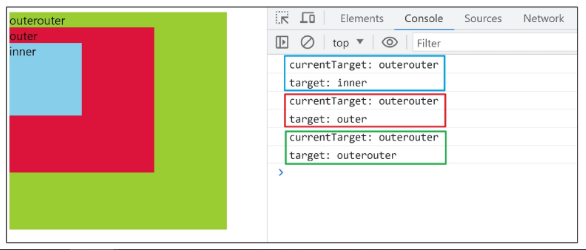
- 'currentTarget' 
    - 핸들러가 연결된 outerouter 요소만을 가리킴 
- 'target' 
    - 실제 이벤트가 발생하는 요소를 가리킴
- 핸들러는 outerouter에만 연결되어 있지만 하위 요소 outer와 inner를 클릭해도 해당 핸들러가 동작함 
- > 클릭 이벤트가 어디서 발생했든 상관없이 outerouter까지 이벤트가 버블링 되어 핸들러를 실행시키기 때문
```html
<!-- target-currentTarget.html --> 
```
```html
<style> 
    #outerouter { 
        width: 300px; 
        height: 300px; 
        background-color: yellowgreen;
    }

    #outer { 
        width: 200px; 
        height: 200px; 
        background-color: crimson; 
    }

    #inner { 
        width: 100px; 
        height: 100px; 
        background-color: skyblue; 
    }
</style>
```js
<div id="outerouter">
    outerouter
    <div id="outer">
        outer
        <div id="inner">inner</div>
    </div>
</div>

<script>
    const outerOuterElement = document.querySelector('#outerouter')

    const clickHandler = function (event) {
        console.log('currentTarget:', event.currentTarget.id)
        console.log('target:', event.target.id)
    }

    outerOuterElement.addEventListener('click', clickHandler)
</script>
```

### 캡처링과 버블링

#### 캡처링(capturing) 
이벤트가 하위 요소로 전파되는 단계 (버블링과 반대)

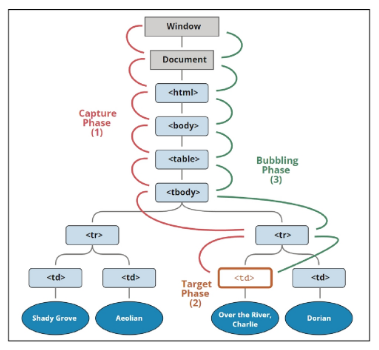

#### 캡처링과 버블링
- table 의 하위 요소 td를 클릭하면 이벤트는 먼저 최상위 요소부터 아래로 전파됨 (캡처링) 
- 실제 이벤트가 발생한 지점(event.target) 에서 실행된 후 다시 위로 전파 (버블링) 
    - 이 전파 과정에서 상위 요소에 할당된 이벤트 핸들러들이 호출되는 것 
- > 캡처링은 실제 개발자가 다루는 경우가 거의 없으므로 버블링에 집중하기

### 버블링의 필요성

#### 버블링이 필요한 이유
- 만약 다음과 같이 각자 다른 동작을 수행하는 버튼이 여러 개가 있다고 가정 
- 그렇다면 각 버튼마다 서로 다른 이벤트 핸들러를 할당해야 할까? 
```js
    <div> 
        <button></button> 
        <button></button> 
        ...
        <button></button> 
        <button></button> 
    </div>
```
- 만약 다음과 같이 각자 다른 동작을 수행하는 버튼이 여러 개가 있다고 가정 
- 그렇다면 각 버튼마다 서로 다른 이벤트 핸들러를 할당해야 할까? 
- > 각 버튼의 공통 조상인 div 요소에 이벤트 핸들러 단 하나만 할당하기

- 요소의 공통 조상에 이벤트 핸들러를 단 하나만 할당하면, 여러 버튼 요소에서 발생하는 이벤트를 한꺼번에 다룰 수 있음 
- 공통 조상에 할당한 핸들러에서 event. target을 이용하면 실제 어떤 버튼에서 이벤트가 발생했는지 알 수 있기 때문
```js
    // 예시

    const divTag = document.querySellector('div')

    divTag.addEventListener('click', function (event) { 
        console.log(event.target)
    })
```

## event handler 활용

### event handler 활용 실습 
1. 버튼을 클릭하면 숫자를 1씩 증가해서 출력하기 
2. 사용자 입력 값을 실시간으로 출력하기 
3. 사용자 입력 값을 실시간으로 출력하기 + 버튼을 클릭하면 출력된 값의 CSS 스타일을 변경하기 
4. todo 프로그램 구현 
5. 로또 번호 생성기 구현

##### 1. click 이벤트 실습 
- 버튼을 클릭하면 숫자를 1씩 증가
  
    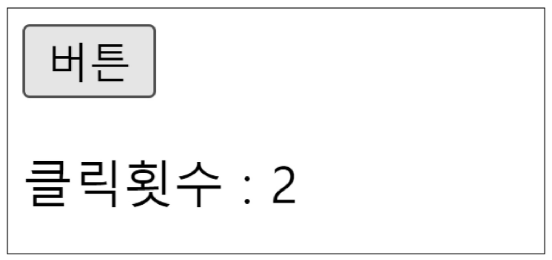
```html
    <!-- click-event.html -->
```
```js
    <button id="btn">버튼</button> 
    <p>클릭횟수: <span id="counter">0</span></p>

    // 1. 초기값 할당 
    let counterNumber = 0 
    
    // 2. 버튼 요소 선택 
    const btn = document.querySelector('#btn') 
    
    // 3. 콜백 함수 (버튼에 클릭 이벤트가 발생할때마다 실행할 코드) 
    const clickHandler = function () { 
        
        // 3.1 초기값 += 1 
        counterNumber += 1 
        
        // 3.2 p 요소를 선택 
        const spanTag = document.querySelector('#counter') 
        
        // 3.3 p 요소의 컨텐츠를 1 증가한 초기값으로 설정 
        spanTag.textContent = counterNumber 
    }

    // 4. 버튼에 이벤트 핸들러 부착 (클릭 이벤트) 
    btn.addEventListener('click', clickHandler)
```

##### 2. input 이벤트 실습
- 사용자의 입력 값을 실시간으로 출력하기

    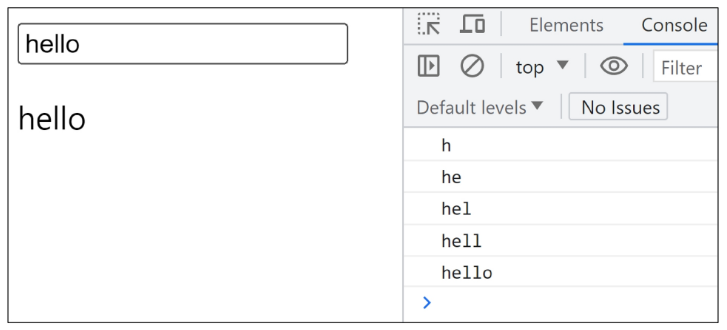
```html
<!-- input-event.html --> 
```
```js
<input type="text" id="text-input"> 
<p></p>
```
```js
// 1. input 요소 선택 
const inputTag = document.querySelector('#text-input') 

// 2. p 요소 선택 
const pTag = document.querySelector('p') 

// 3. 콜백 함수 (input 요소에 input 이벤트가 발생할때마다 실행할 코드) 
const inputHandler = function (event) { 

    // 3.1 작성하는 데이터가 어디에 누적되고 있는지 찾기 
    // console.log(event.currentTarget) 
    console.log(event.currentTarget.value) 
    
    // 3.2 p요소의 컨텐츠에 작성하는 데이터를 추가 
    pTag.textContent = event.currentTarget.value 
}

// 4. input 요소에 이벤트 핸들러 부착 (input 이벤트) 
inputTag.addEventListener('input', inputHandler)
```

##### 'currentTarget' 주의사항 
- console.log()로 event 객체를 출력할 경우 currentTarget 키의 값은 null을 가짐 
- currentTarget은 이벤트가 처리되는 동안에만 사용할 수 있기 때문 
- 대신 console.log(event.currentTarget)을 사용하여 콘솔에서 확인 가능 
- > currentTarget 이후의 속성 값들은 'target'을 참고해서 사용하기

    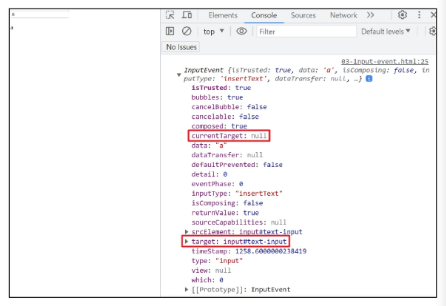

##### 3. click & input 이벤트 실습
- 사용자의 입력 값을 실시간으로 출력 '+' 버튼을 클릭하면 출력한 값의 CSS 스타일을 변경하기

    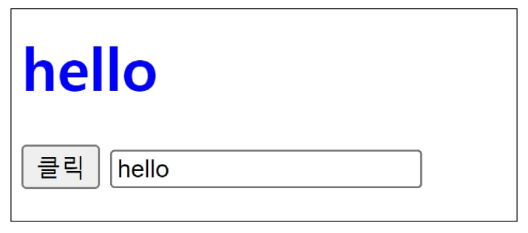
```html
    <!-- click-input-event.html -->

     <head> 
        <style> 
            .blue { 
                color: blue; 
            }
        </style>
    </head> 
    
    <body> 
        <h1></h1>
        <button id="btn">클릭</button> 
        <input type="text" id="text-input"> 
    </body>
```
```js
    // input 구현 
    const inputTag = document.querySelector('#text-input') 
    const h1Tag document.querySelector('h1')  
    
    const inputHandler= function (event) { 
        h1Tag.textContent = event.currentTarget.value 
    } 
    
    inputTag.addEventListener('input', inputHandler)  
    
    // click 구현 
    const btn = document.querySelector('#btn') 
    
    const clickHandler = function () {  
        // 1. add 방법 
        h1Tag.classList.add('blue')   
        
        // 2. toggle 방법
        hlTag.classList.toggle('blue')  
        
        // 3. if 방법 
        if (hiTag.classList.value) { 
            h1Tag.classList.remove('blue') 
        } else { 
            h1Tag.classList.add('blue') 
        } 
    }
    
    btn.addEventListener('click', clickHandler)
```

##### 4. todo 실습
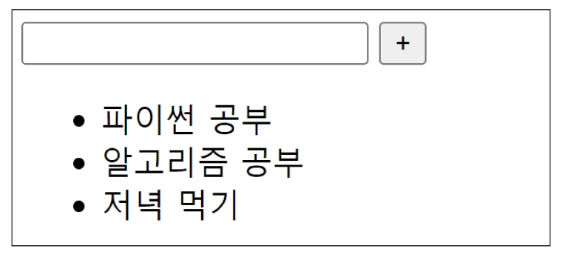
```html
<!-- todo.html --> 
 
 <input type="text" class="input-text"> 
 <button id="btn">+</button> 
 <ul></ul>
```
```js
// 1. 필요한 요소 선택 
const inputTag = document.querySelector('.input-text') 
const btn = document.querySelector('#btn') 
const ulTag document.querySelector('ul') 

const addTodo = function (event) { 
    // 2.1 사용자 입력 데이터 저장 
    const inputData = inputTag.value 
    
    // 2.2 데이터를 저장할 li 요소를 생성 
    const liTag document.createElement('li') 

    // 2.3 li 요소 컨텐츠에 데이터 입력 
    liTag.textContent = inputData 
    
    // 2.4 li 요소를 부모 ul 요소의 자식 요소로 추가 
    ulTag.appendChild(liTag) 
    
    // 2.5 todo 추가 후 input의 입력 데이터는 초기화 
    inputTag.value = ''
}
```
- todo 추가 기능 구현
    1. 빈 문자열 입력 방지
    2. 입력이 없을 경우 대화상자를 띄움
```html
<!-- todo.html --> 
```
```js
const addTodo = function (event) { 
    const inputData = inputTag.value 
    if (inputData.trim()) { 
        const LiTag = document.createElement('li') 
        liTag.textContent = inputData 
        ulTag.appendChild(liTag) 
        inputTag.value = ''
    } else { 
        alert('할 일을 입력하세요..') 
    }
}
```

##### 5. 로또 번호 생성기 실습
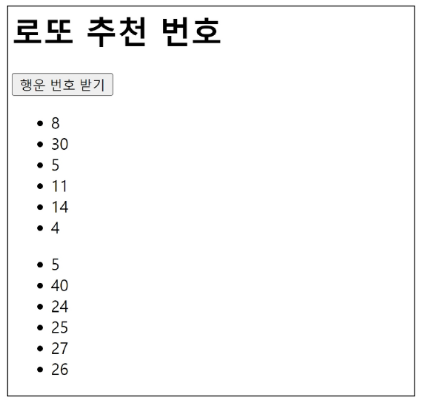
```html
<!-- lottery.html --> 
 
<h1>로또 추천 번호</h1> 
<button id="btn">행운 번호 받기</button> 
<div></div>

<script src="https://cdn.jsdelivr.net/npm/lodash@4.17.21/lodash.min.js"></script> 

<script> 
    // 1. 필요한 요소 선택 
    const hiTag = document.querySelector('h1 ') 
    const btn = document.querySelector('#btn') 
    const divTag = document.querySelector('div') 
    
    // 2. 로또 번호를 생성하는 함수 
    const getLottery function (event) { 
        // 2.1 1부터 45까지의 값이 필요 
        const numbers.range(1, 46)
    
        
        // 2.2 45개의 요소가 있는 배열에서 6개 번호 추출 
        const sixNumbers.sampleSize (numbers, 6) 
        
        // 2.5 6개의 li 요소를 담을 ul 요소 생성 
        const ulTag document.createElement('ul') 
        
        // 2.3 추출한 번호 배열을 "반복"하면서 li 요소를 생성 
        sixNumbers.forEach((number) => { 
            // 2.4 번호를 담을 li 요소 생성 후 입력
            const liTag document.createElement('li')
            ulTag.appendChild(liTag)

            // 2.6 만들어진 li를 ul 요소에 추가
            liTag.textContent = number 
        })    
        // 2.7 완성한 ul 요소를 div 요소에 추가 
        divTag.appendChild(ulTag) 
    }
    // 3. 버튼 요소에 이벤트 핸들러를 부착 
    btn.addEventListener('click', getLottery) 
</script>

##### lodash 
- 모듈성, 성능 및 추가 기능을 제공하는 JavaScript 유틸리티 라이브러리 
- array, object 등 자료구조를 다룰 때 사용하는 유용하고 간편한 함수들을 제공 
- https://lodash.com/

### 이벤트 기본 동작 취소하기

#### 이벤트 기본 동작 취소하기
- HTML의 각 요소가 기본적으로 가지고 있는 이벤트가 때로는 방해가 되는 경우가 있어 이벤트의 기본 동작을 취소할 필요가 있음 
- 예시 
    - form 요소의 제출 이벤트를 취소하여 페이지 새로고침을 막을 수 있음 
    - a 요소를 클릭 할 때 페이지 이동을 막고 추가 로직을 수행할 수 있음

#### .preventDefault()
해당 이벤트에 대한 기본 동작을 실행하지 않도록 지정

#### 이벤트 동작 취소 실습
- copy 이벤트 동작 취소 
    - 콘텐츠를 복사 하는 것을 방지

    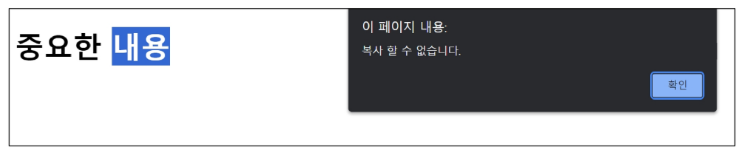
```html
    <!-- prevent-event.html --> 
     
     <h1>중요한 내용</h1> 
     <script> 
        const h1Tag = document.querySelector('h1') 
        
        h1Tag.addEventListener('copy', function (event) { 
            console.log(event) 
            event.preventDefault() 
            alert('복사 할 수 없습니다.') 
        }) 
    </script>
```
- form 제출 시 페이지 새로고침 동작 취소 
    - form 요소의 submit 동작(action 값으로 요청)을 취소 시킴
```html
    <!-- prevent-event.html --> 

    <form id="my-form"> 
        <input type="text" name="username"> 
        <button type="submit">Submit</button> 
    </form>
```
```js
    const formTag = document.querySelector('#my-form') 
    
    const handleSubmit = function (event) { 
        event.preventDefault() 
    } 
    
    formTag.addEventListener('submit', handleSubmit)
```

## 참고

### addEventListener와 화살표 함수 관계

#### addEventListener에서의 화살표 함수 주의사항 
- 화살표 함수는 자신만의 this를 생성하지 않음 
- 대신, 화살표 함수가 정의된 곳의 상위 스코프의 this를 그대로 사용 
- 대부분의 경우, 이는 전역 객체(브라우저에서는 window)를 가리키게 됨 
- 해결책 
    1. 일반 함수로 사용하기 
    2. 화살표 함수일 경우 event.currentTarget을 사용하기 
```js
    element.addEventListener('click', function () { 
        console.log(this) // <button id="function">function</button> 
    }) 
    
    element.addEventListener('click', () => {
        console.log(this) // window 
    })
```